In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from scipy.stats import norm, invgamma, gaussian_kde
from matplotlib import pyplot as plt
from cycler import cycler
np.random.seed(123457)
%matplotlib inline

In [2]:
X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")
time = pd.read_csv("time.csv")

In [3]:
X.head()

,x1,x2
0,-1.383423,0
1,0.491178,0
2,-0.528827,0
3,-0.359455,0
4,0.173340,0


In [4]:
y.head()

,y
0,10.677616
1,18.885513
2,11.246081
3,9.364583
4,13.434298


In [5]:
time.head()

,time
0,0.1
1,0.2
2,0.3
3,0.4
4,0.5


In [6]:
x1 = list(X['x1'])
x2 = list(X['x2'])
y1 = list(y['y'])
time1 = list(time['time'])

In [7]:
len(x1)

200

In [8]:
len(x2)

200

In [9]:
len(time1)

200

In [10]:
df = pd.DataFrame({
    'time' : time1,
    'x1' : x1,
    'x2' : x2,
    'y' : y1
})

In [11]:
df

,time,x1,x2,y
0,0.1,-1.383423,0,10.677616
1,0.2,0.491178,0,18.885513
2,0.3,-0.528827,0,11.246081
3,0.4,-0.359455,0,9.364583
4,0.5,0.173340,0,13.434298
...,...,...,...,...
195,19.6,-0.027111,1,13.368749
196,19.7,-1.520284,1,13.958111
197,19.8,-1.227090,1,13.976362
198,19.9,-0.724484,1,8.581417


# Task 1

Time series plots (of input audio and output MEG signal)

Text(0.5, 1.0, 'Time Series Plot for input')

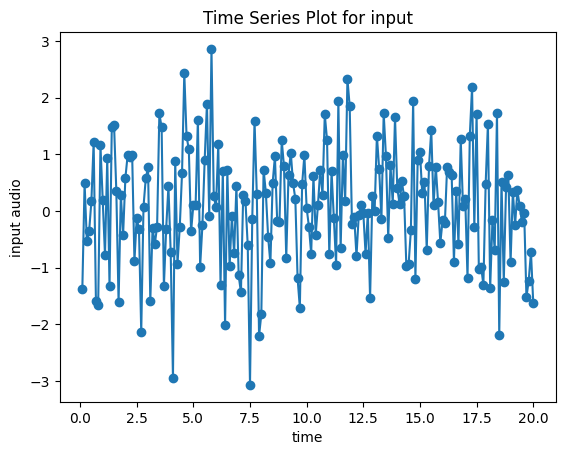

In [12]:
plt.plot(df['time'],df['x1'], marker = 'o')
plt.xlabel("time")
plt.ylabel("input audio")
plt.title("Time Series Plot for input")

Text(0.5, 1.0, 'Time Series Plot for output')

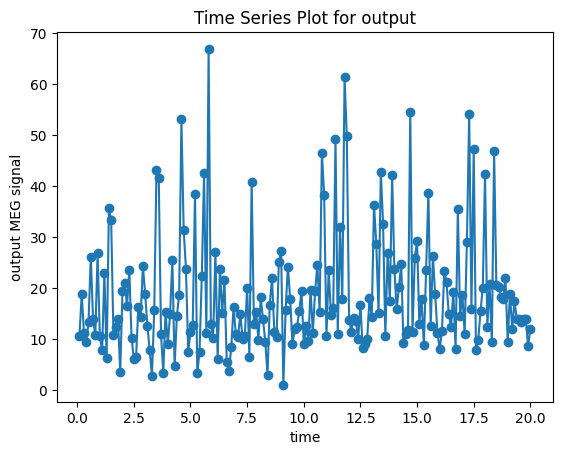

In [13]:
plt.plot(df['time'],df['y'], marker = 'o')
plt.xlabel("time")
plt.ylabel("output MEG signal")
plt.title("Time Series Plot for output")

Distribution for each (input & output) signal

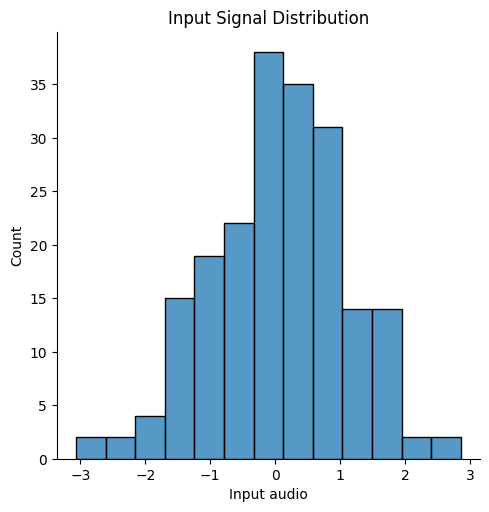

In [14]:
sns.displot(df, x="x1")
plt.xlabel("Input audio")
plt.ylabel("Count")
plt.title("Input Signal Distribution")
plt.show()

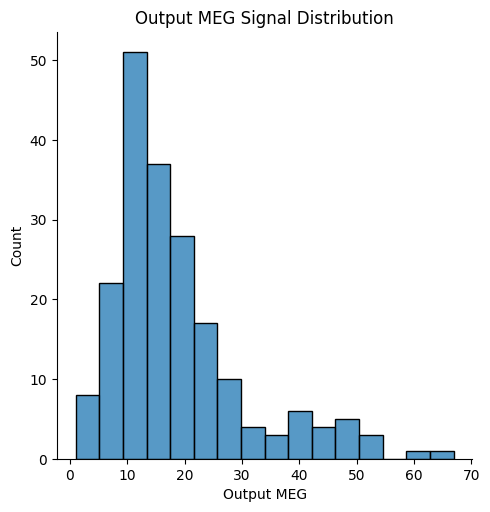

In [15]:
sns.displot(df, x="y")
plt.xlabel("Output MEG")
plt.ylabel("Count")
plt.title("Output MEG Signal Distribution")
plt.show()

Correlation and scatter plots (between the audio input and output brain signal) to examine their
dependencies

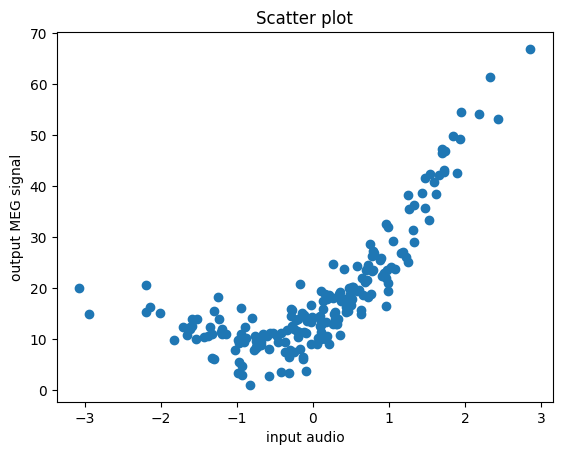

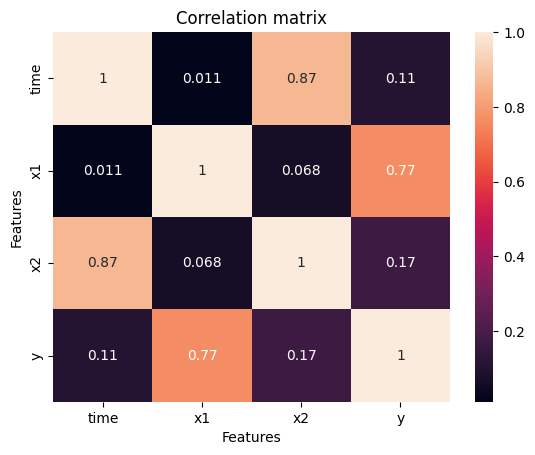

In [16]:
plt.scatter(df['x1'],df["y"], marker='o')

# Labelling 
plt.xlabel("input audio")
plt.ylabel("output MEG signal")
plt.title("Scatter plot")
plt.show()
names=df.columns

correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

Boxplots of output brain signals to examine effect of sound categories

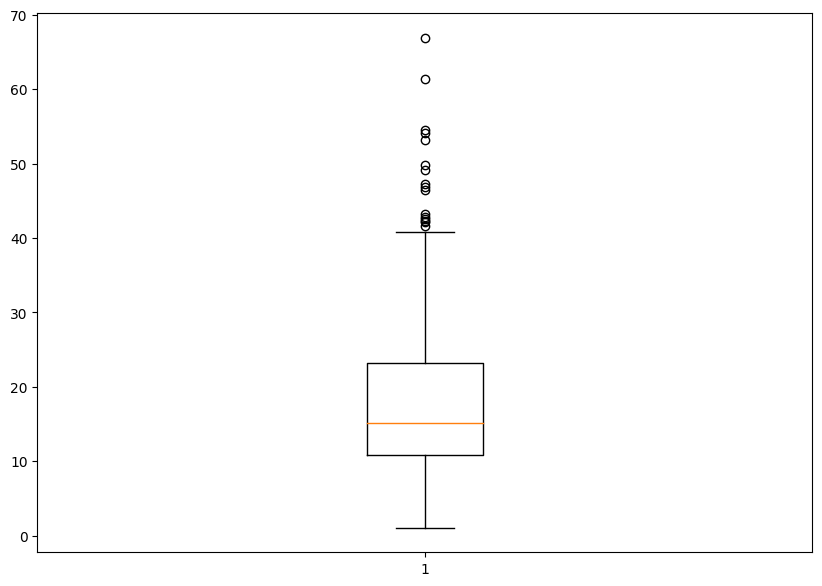

In [17]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(df['y'])
# show plot
plt.show()

Preliminary data analysis for each type of input sound signal
separately (i.e. when 𝑥2 = 0, and 𝑥2 = 1)

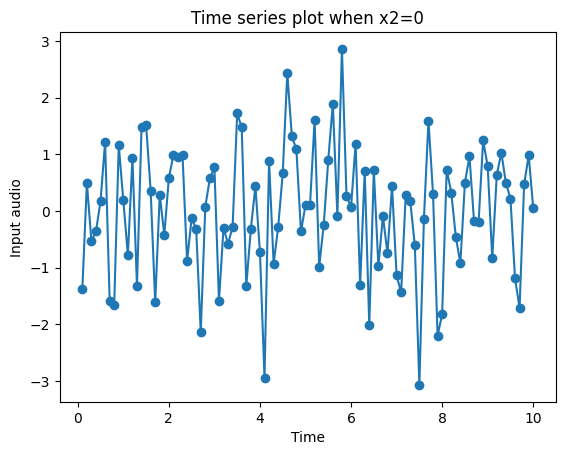

In [18]:
# Neutral Audio Preliminary Analysis
df_x_0 = df[df['x2'] ==0] 
df_x_0.head()
plt.plot(df_x_0['time'],df_x_0["x1"], marker='o')
# Labelling 
plt.xlabel("Time")
plt.ylabel("Input audio")
plt.title("Time series plot when x2=0")
# Display
plt.show()

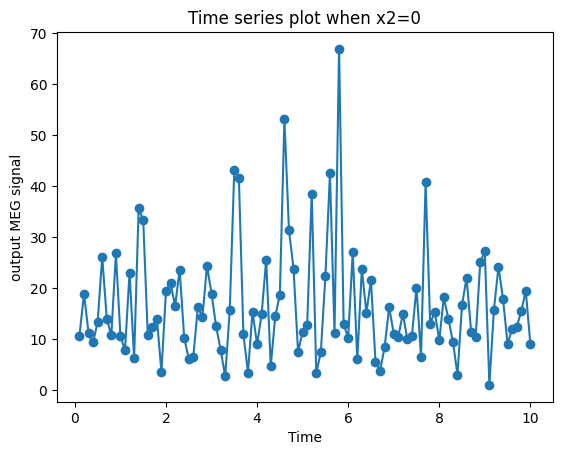

In [19]:
plt.plot(df_x_0['time'],df_x_0["y"], marker='o')
# Labelling 
plt.xlabel("Time")
plt.ylabel("output MEG signal")
plt.title("Time series plot when x2=0")
# Display
plt.show()

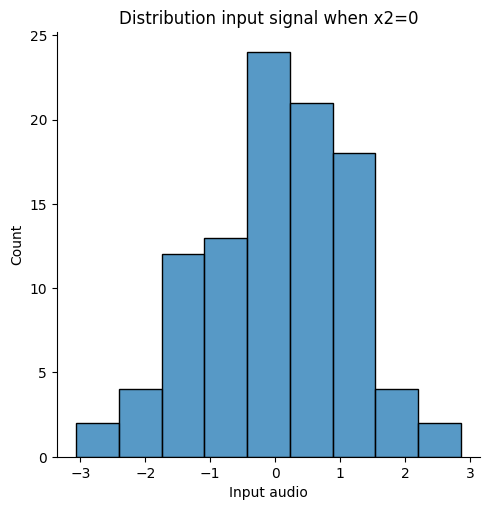

In [20]:
sns.displot(df_x_0, x="x1")
plt.xlabel("Input audio")
plt.ylabel("Count")
plt.title("Distribution input signal when x2=0")
# Display
plt.show()

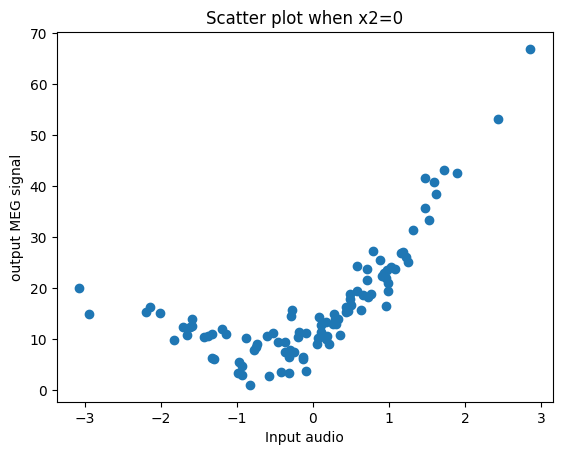

In [21]:
plt.scatter(df_x_0['x1'],df_x_0["y"], marker='o')
# Labelling 
plt.xlabel("Input audio")
plt.ylabel("output MEG signal")
plt.title("Scatter plot when x2=0")
# Display
plt.show()

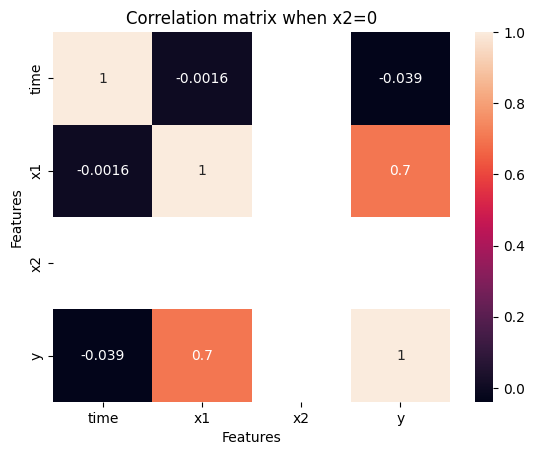

In [22]:
correlation_mat = df_x_0.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix when x2=0")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

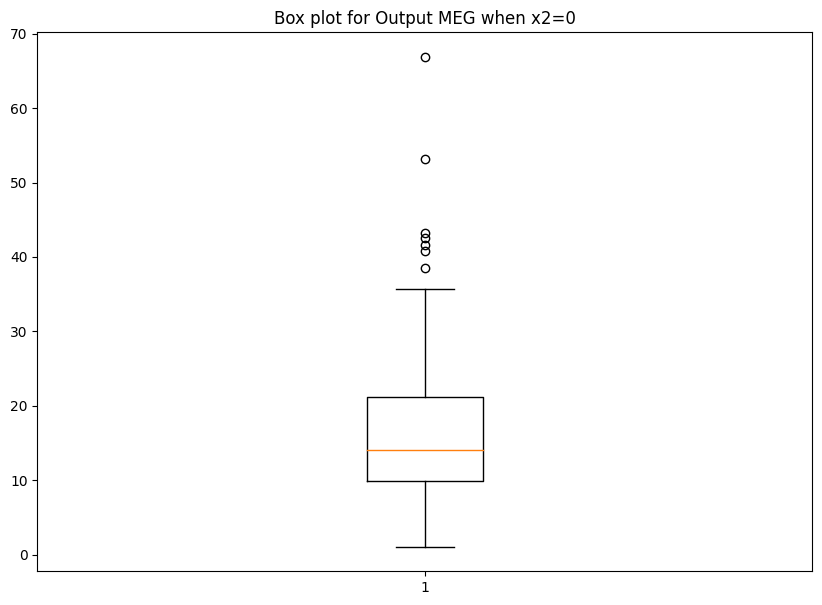

In [23]:
fig = plt.figure(figsize =(10, 7))
 # Creating plot
plt.boxplot(df_x_0['y'])
plt.title("Box plot for Output MEG when x2=0")
 # show plot
plt.show()


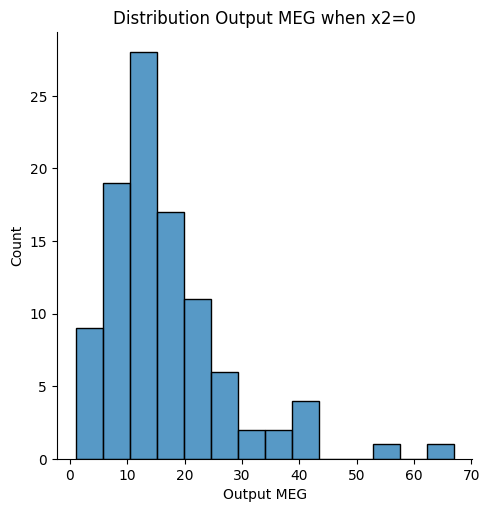

In [24]:
sns.displot(df_x_0, x="y")
plt.xlabel("Output MEG")
plt.ylabel("Count")
plt.title("Distribution Output MEG when x2=0")
# Display
plt.show()

Text(0.5, 1.0, 'Time series plot when x2=1')

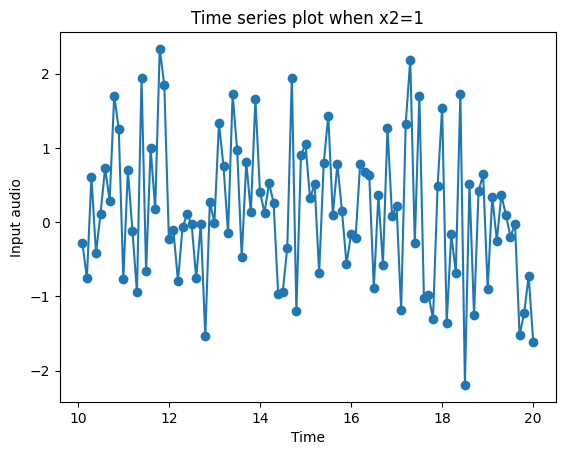

In [25]:
# Emotional Audio Preliminary Analysis

df_x_1 = df[df['x2'] ==1] 
df_x_1.head()
plt.plot(df_x_1['time'],df_x_1["x1"], marker='o')
# Labelling 
plt.xlabel("Time")
plt.ylabel("Input audio")
plt.title("Time series plot when x2=1")
# Display

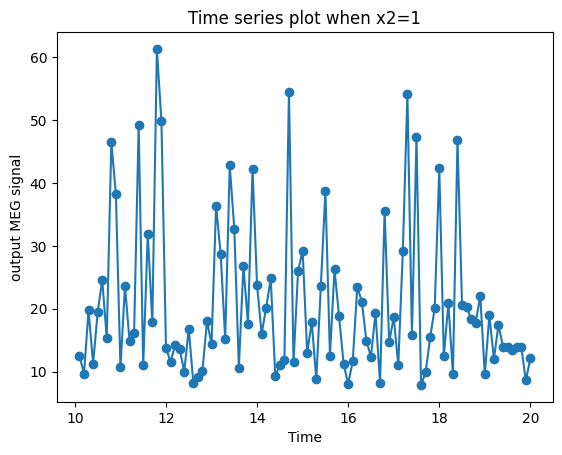

In [26]:
plt.show()
plt.plot(df_x_1['time'],df_x_1["y"], marker='o')
# Labelling 
plt.xlabel("Time")
plt.ylabel("output MEG signal")
plt.title("Time series plot when x2=1")
# Display
plt.show()

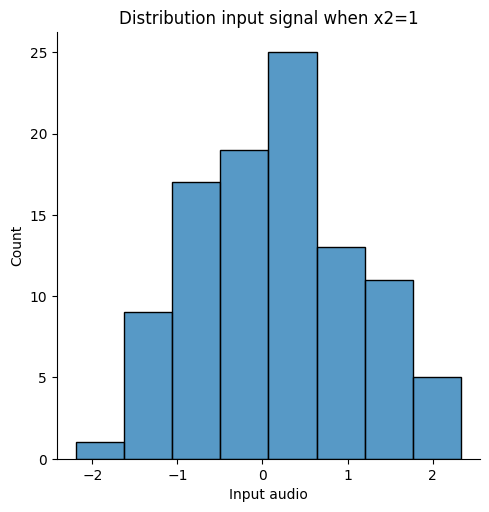

In [27]:
sns.displot(df_x_1, x="x1")
plt.xlabel("Input audio")
plt.ylabel("Count")
plt.title("Distribution input signal when x2=1")
# Display
plt.show()

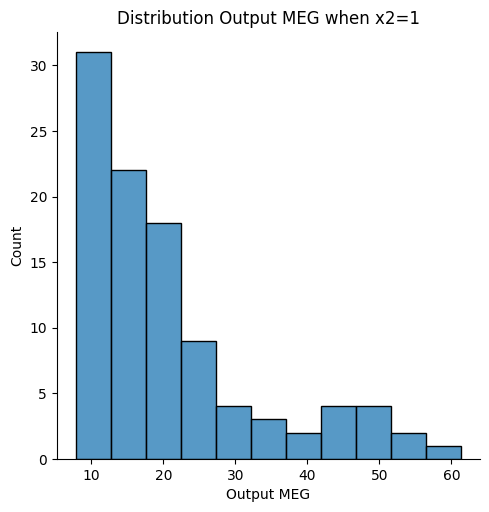

In [28]:
sns.displot(df_x_1, x="y")
plt.xlabel("Output MEG")
plt.ylabel("Count")
plt.title("Distribution Output MEG when x2=1")

# Display
plt.show()

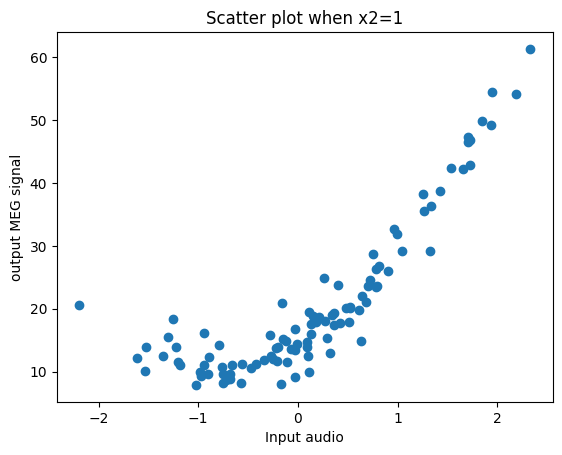

In [29]:
plt.scatter(df_x_1['x1'],df_x_1["y"], marker='o')
# Labelling 
plt.xlabel("Input audio")
plt.ylabel("output MEG signal")
plt.title("Scatter plot when x2=1")
# Display
plt.show()

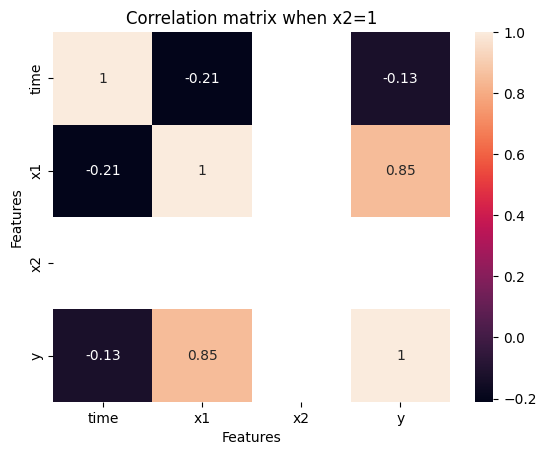

In [30]:
correlation_mat = df_x_1.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix when x2=1")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

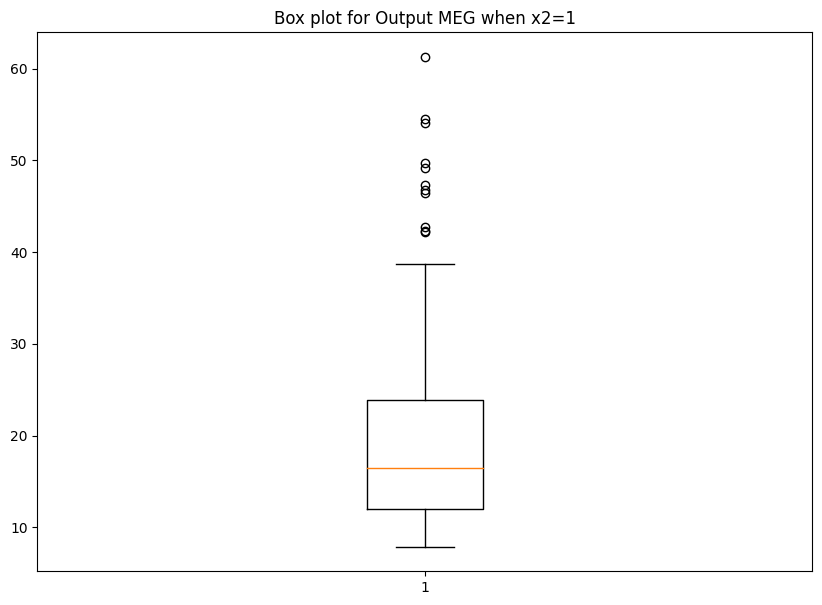

In [31]:
fig = plt.figure(figsize =(10, 7))
 # Creating plot
plt.boxplot(df_x_1['y'])
plt.title("Box plot for Output MEG when x2=1")
 # show plot
plt.show()

# Task 2

Task 2.1

[[ 5.17127282]
 [-0.53732529]
 [ 2.20201791]
 [16.93575071]]


C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\664599130.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1_1 = y1_1[:, np.newaxis]


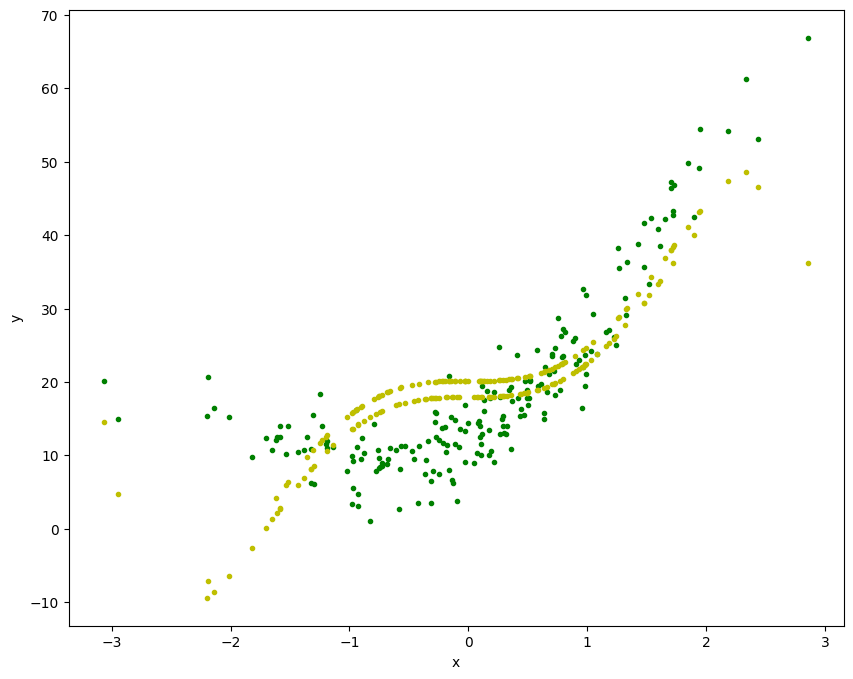

In [32]:
# Model 1
X1=list(df['x1'])
X2=list(df['x2'])
X1_3=[]
X1_5=[]
for i in range(len(X1)):
    X1_3.append(pow(X1[i],3))
    X1_5.append(pow(X1[i],5))
X_mod1 = np.vstack([X1_3,X1_5,X2,np.ones(len(X2))]).T
# turn y into a column vector
y1_1=df['y']
y1_1 = y1_1[:, np.newaxis]

# Direct least square regression
Theta = np.dot((np.dot(np.linalg.inv(np.dot(X_mod1.T,X_mod1)),X_mod1.T)),y1_1)
print(Theta)
y_pred_1=[]
for i in range(len(X1)):
    y_pred_1.append(Theta[0]*X1_3[i] + Theta[1]*X1_5[i]+Theta[2]*X2[i] + Theta[3]+1)
# plot the results
plt.figure(figsize = (10,8))
plt.plot(X1, y1_1, 'g.')
plt.plot(X1, y_pred_1, 'y.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


[[ 8.62910686]
 [ 2.81398685]
 [16.63559026]]


C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\330741026.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1_2 = y1_2[:, np.newaxis]


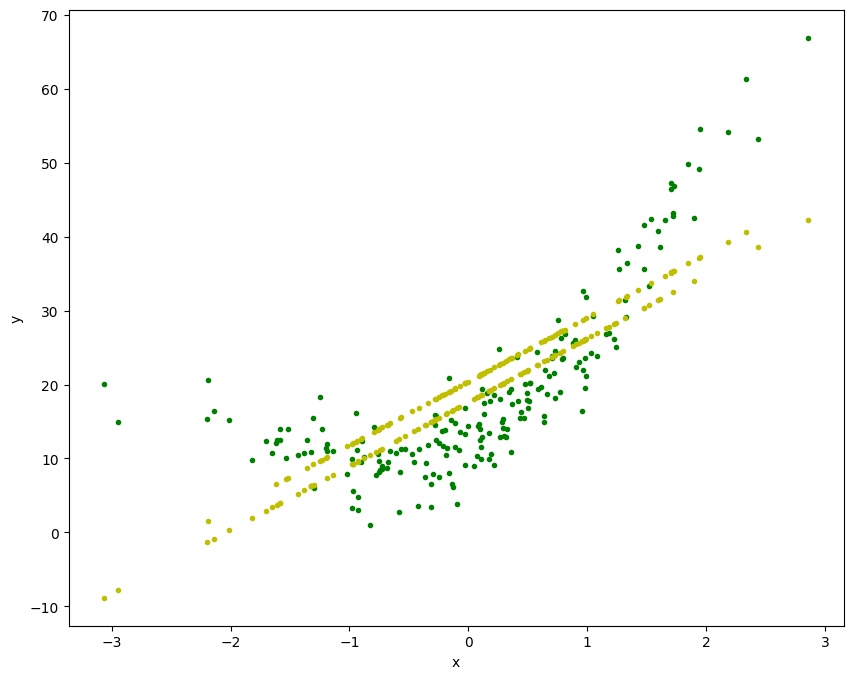

In [33]:
# Model 2
# assemble matrix A
X1=list(df['x1'])
X2=list(df['x2'])

X_mod2 = np.vstack([X1,X2,np.ones(len(X2))]).T
# turn y into a column vector
y1_2=df['y']
y1_2 = y1_2[:, np.newaxis]

# Direct least square regression
Theta = np.dot((np.dot(np.linalg.inv(np.dot(X_mod2.T,X_mod2)),X_mod2.T)),y1_2)
print(Theta)
y_pred_2=[]
for i in range(len(X1)):
    y_pred_2.append(Theta[0]*X1[i] + Theta[1]*X2[i]+ Theta[2]+1)
# plot the results
plt.figure(figsize = (10,8))
plt.plot(X1, y1_2, 'g.')
plt.plot(X1, y_pred_2, 'y.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[[ 8.07945806]
 [ 0.31445012]
 [ 0.55920502]
 [ 3.96814553]
 [14.13172537]]


C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\53349160.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1_3 = y1_3[:, np.newaxis]


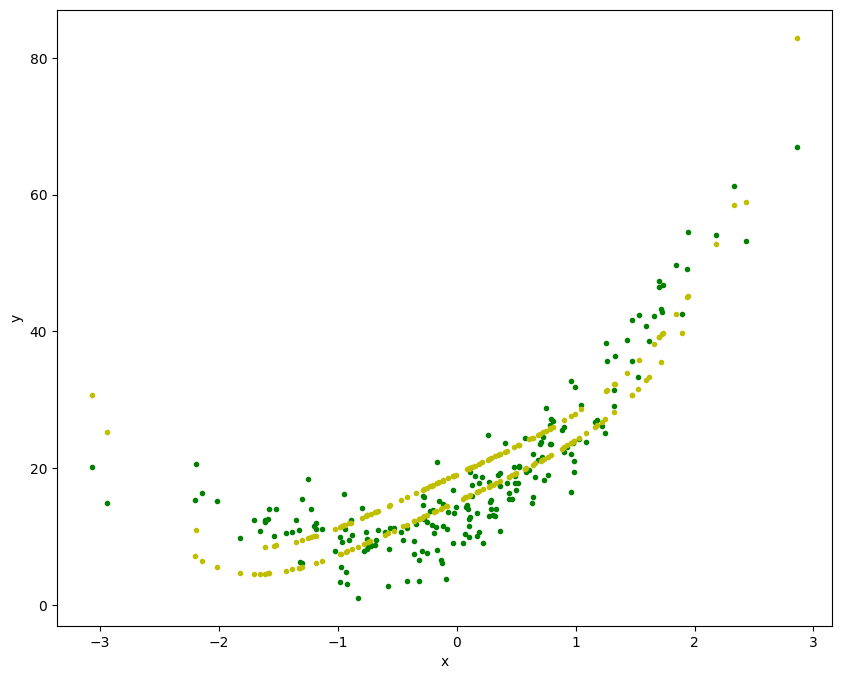

In [34]:
# Model 3
# assemble matrix A
X1=list(df['x1'])
X2=list(df['x2'])
X1_3=[]
X1_4=[]
for i in range(len(X1)):
    X1_3.append(pow(X1[i],3))
    X1_4.append(pow(X1[i],4))
   
X_mod3 = np.vstack([X1,X1_3,X1_4,X2,np.ones(len(X2))]).T
# turn y into a column vector
y1_3=df['y']
y1_3 = y1_3[:, np.newaxis]
# Direct least square regression
Theta = np.dot((np.dot(np.linalg.inv(np.dot(X_mod3.T,X_mod3)),X_mod3.T)),y1_3)
print(Theta)
y_pred_3=[]
for i in range(len(X1)):
    y_pred_3.append(Theta[0]*X1[i] + Theta[1]*X1_3[i]+Theta[2]*X1_4[i] + Theta[3]*X2[i]+Theta[4]+1)
# plot the results
plt.figure(figsize = (10,8))
plt.plot(X1, y1_3, 'g.')
plt.plot(X1, y_pred_3, 'y.')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

[[ 9.35397322]
 [ 4.64696205]
 [-0.57792162]
 [ 0.07479626]
 [ 4.34321644]
 [10.85328261]]


C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\3818667360.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1_4 = y1_4[:, np.newaxis]


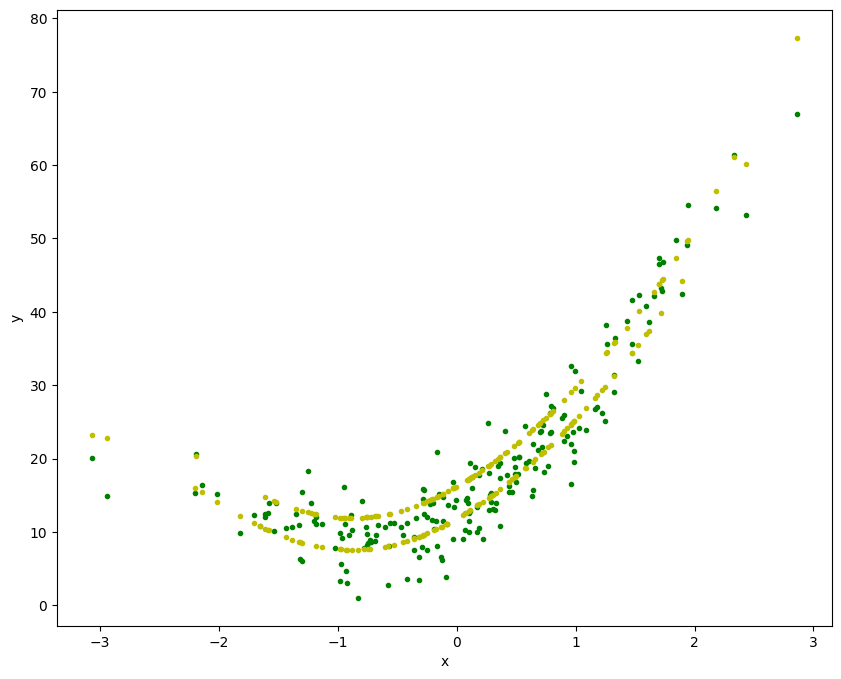

In [35]:
# Model 4
# assemble matrix A
X1=list(df['x1'])
X2=list(df['x2'])
X1_2=[]
for i in range(len(X1)):
    X1_2.append(pow(X1[i],2))
X_mod4 = np.vstack([X1,X1_2,X1_3,X1_5,X2,np.ones(len(X2))]).T
# turn y into a column vector
y1_4=df['y']
y1_4 = y1_4[:, np.newaxis]
# Direct least square regression
Theta = np.dot((np.dot(np.linalg.inv(np.dot(X_mod4.T,X_mod4)),X_mod4.T)),y1_4)
print(Theta)

y_pred_4=[]
for i in range(len(X1)):
    y_pred_4.append(Theta[0]*X1[i] + Theta[1]*X1_2[i]+ Theta[2]*X1_3[i]+Theta[3]*X1_5[i]+Theta[4]*X2[i]+Theta[5]+1)
# plot the results
plt.figure(figsize = (10,8))
plt.plot(X1, y1_4, 'g.')
plt.plot(X1, y_pred_4, 'y.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[[ 8.55216135]
 [ 6.24691708]
 [-0.28296309]
 [ 4.15988326]
 [10.17369609]]


C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\3110276767.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1_5 = y1_5[:, np.newaxis]


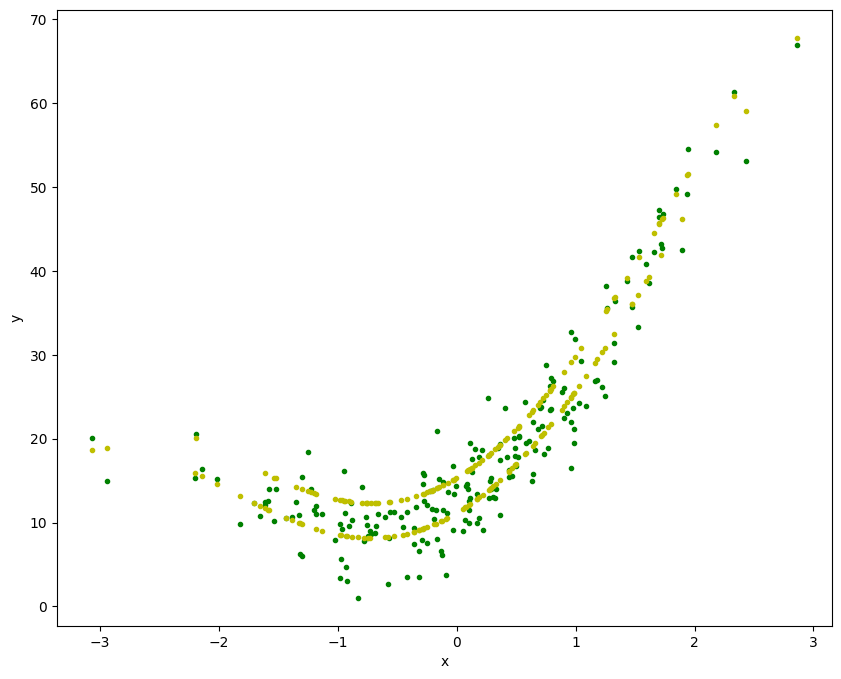

In [36]:
# Model 5
# assemble matrix A
X1=list(df['x1'])
X2=list(df['x2'])
X1_2=[]
X1_4=[]
for i in range(len(X1)):
    X1_2.append(pow(X1[i],2))
    X1_4.append(pow(X1[i],4))
X_mod5 = np.vstack([X1,X1_2,X1_4,X2,np.ones(len(X2))]).T
# turn y into a column vector
y1_5=df['y']
y1_5 = y1_5[:, np.newaxis]
# Direct least square regression
Theta = np.dot((np.dot(np.linalg.inv(np.dot(X_mod5.T,X_mod5)),X_mod5.T)),y1_5)
print(Theta)
y_pred_5=[]
for i in range(len(X1)):
    y_pred_5.append(Theta[0]*X1[i] + Theta[1]*X1_2[i]+Theta[2]*X1_4[i] + Theta[3]*X2[i]+Theta[4]+1)

    # plot the results
plt.figure(figsize = (10,8))
plt.plot(X1, y1_5, 'g.')
plt.plot(X1, y_pred_5, 'y.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Task 2.2

In [37]:
RSS_model1 = (np.sum(np.square(y1_1-y_pred_1)))
RSS_model1

12025.421352951202

In [38]:
RSS_model2 = (np.sum(np.square(y1_2-y_pred_2)))
RSS_model2

11438.949638549428

In [39]:
RSS_model3 = (np.sum(np.square(y1_3-y_pred_3)))
RSS_model3

5128.3120610039605

In [40]:
RSS_model4 = (np.sum(np.square(y1_4-y_pred_4)))
RSS_model4

2102.062855996579

In [41]:
RSS_model5 = (np.sum(np.square(y1_5-y_pred_5)))
RSS_model5

1836.1676067722374

Task 2.3

C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\322614232.py:4: RuntimeWarning: divide by zero encountered in log
  y2_1.append(np.log(scipy.stats.norm.pdf(y_pred_1,i,1)).sum())


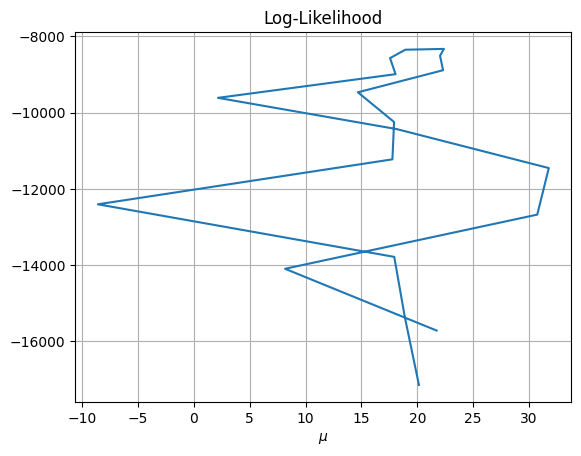

In [42]:
# Model 1
y2_1 = []
for i in range(len(y_pred_1)):
    y2_1.append(np.log(scipy.stats.norm.pdf(y_pred_1,i,1)).sum())
plt.plot(y_pred_1,y2_1)
plt.title(r'Log-Likelihood')
plt.xlabel(r'$\mu$')
plt.grid()
plt.savefig("likelihood_normal_distribution_02.png", bbox_inches='tight')
#plt.show()

X_mod1 = sm.add_constant(X_mod1)
#fit regression model
model_1 = sm.OLS(y1_1, X_mod1).fit()


C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\1376788682.py:4: RuntimeWarning: divide by zero encountered in log
  y2_2.append(np.log(scipy.stats.norm.pdf(y_pred_2,i,1)).sum())


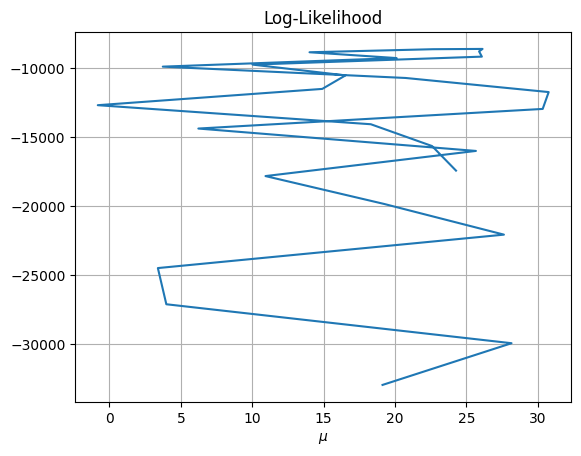

In [43]:
# Model 2
y2_2 = []
for i in range(len(y_pred_2)):
    y2_2.append(np.log(scipy.stats.norm.pdf(y_pred_2,i,1)).sum())
plt.plot(y_pred_2,y2_2)
plt.title(r'Log-Likelihood')
plt.xlabel(r'$\mu$')
plt.grid()
plt.savefig("likelihood_normal_distribution_02.png", bbox_inches='tight')
#plt.show()
import statsmodels.api as sm
X_mod2 = sm.add_constant(X_mod2)

#fit regression model
model_2 = sm.OLS(y1_2, X_mod2).fit()

C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\3641908402.py:4: RuntimeWarning: divide by zero encountered in log
  y2_3.append(np.log(scipy.stats.norm.pdf(y_pred_3,i,1)).sum())


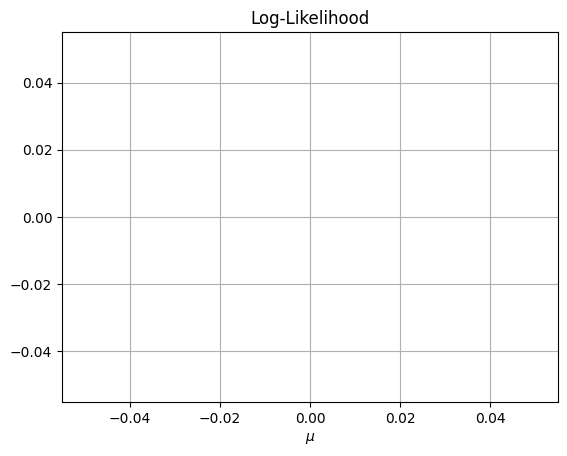

In [44]:
# Model 3
y2_3 = []
for i in range(len(y_pred_3)):
    y2_3.append(np.log(scipy.stats.norm.pdf(y_pred_3,i,1)).sum())
plt.plot(y_pred_3,y2_3)
plt.title(r'Log-Likelihood')
plt.xlabel(r'$\mu$')
plt.grid()
plt.savefig("likelihood_normal_distribution_02.png", bbox_inches='tight')
#plt.show()

X_mod3 = sm.add_constant(X_mod3)
#fit regression model
model_3 = sm.OLS(y1_3, X_mod3).fit()

C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\2145405351.py:4: RuntimeWarning: divide by zero encountered in log
  y2_4.append(np.log(scipy.stats.norm.pdf(y_pred_4,i,1)).sum())


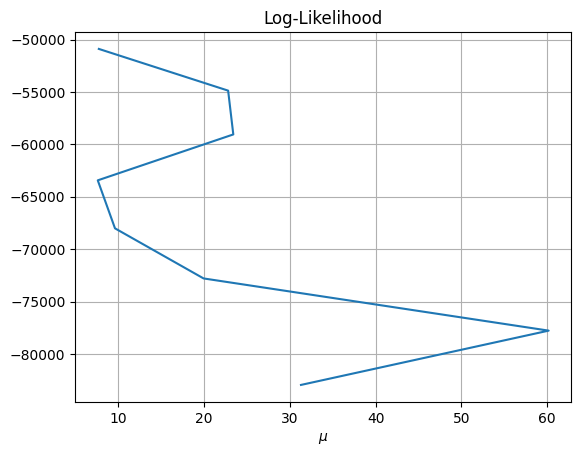

In [45]:
# Model 4
y2_4 = []
for i in range(len(y_pred_4)):
    y2_4.append(np.log(scipy.stats.norm.pdf(y_pred_4,i,1)).sum())
plt.plot(y_pred_4,y2_4)
plt.title(r'Log-Likelihood')
plt.xlabel(r'$\mu$')
plt.grid()
plt.savefig("likelihood_normal_distribution_02.png", bbox_inches='tight')
#plt.show()

X_mod4 = sm.add_constant(X_mod4)
#fit regression model
model_4 = sm.OLS(y1_4, X_mod4).fit()

C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\3304034361.py:4: RuntimeWarning: divide by zero encountered in log
  y2_5.append(np.log(scipy.stats.norm.pdf(y_pred_5,i,1)).sum())


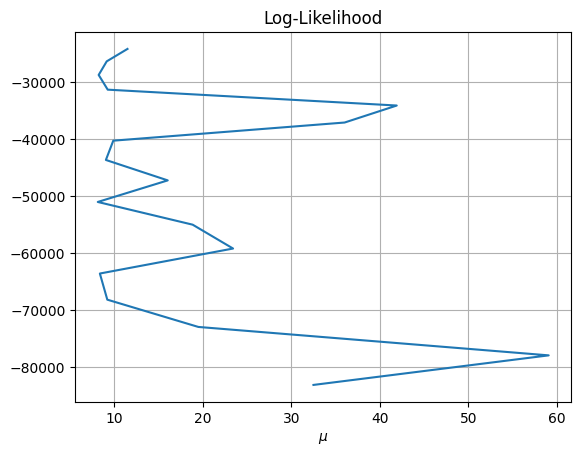

In [46]:
# Model 5
y2_5 = []
for i in range(len(y_pred_5)):
    y2_5.append(np.log(scipy.stats.norm.pdf(y_pred_5,i,1)).sum())
plt.plot(y_pred_5,y2_5)
plt.title(r'Log-Likelihood')
plt.xlabel(r'$\mu$')
plt.grid()
plt.savefig("likelihood_normal_distribution_02.png", bbox_inches='tight')
#plt.show()

X_mod5 = sm.add_constant(X_mod5)
#fit regression model
model_5 = sm.OLS(y1_5, X_mod5).fit()

Task 2.4

In [47]:
# Model 1
#view AIC of model
print("AIC : ",model_1.aic)
#view BIC of model
print("BIC : ",model_1.bic)


AIC :  1391.5133089943006
BIC :  1404.7065784604927


In [48]:
# Model 2
#view AIC of model
print("AIC : ",model_2.aic)
#view BIC of model
print("BIC : ",model_2.bic)


AIC :  1379.340074082955
BIC :  1389.235026182599


In [49]:
# Model 3
#view AIC of model
print("AIC : ",model_3.aic)
#view BIC of model
print("BIC : ",model_3.bic)


AIC :  1218.4623054274284
BIC :  1234.9538922601687


In [50]:
# Model 4
#view AIC of model
print("AIC : ",model_4.aic)
#view BIC of model
print("BIC : ",model_4.bic)


AIC :  1030.0507979474817
BIC :  1049.84070214677


In [51]:
# Model 5
#view AIC of model
print("AIC : ",model_5.aic)
#view BIC of model
print("BIC : ",model_5.bic)


AIC :  997.9343321807468
BIC :  1014.4259190134869


Task 2.5 and Task 2.6

# Best model candidate is model 5

[[ 8.57313603]
 [ 6.25624505]
 [-0.28507807]
 [ 4.346251  ]
 [10.1721488 ]]


C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\2703638269.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1 = y1[:, np.newaxis]


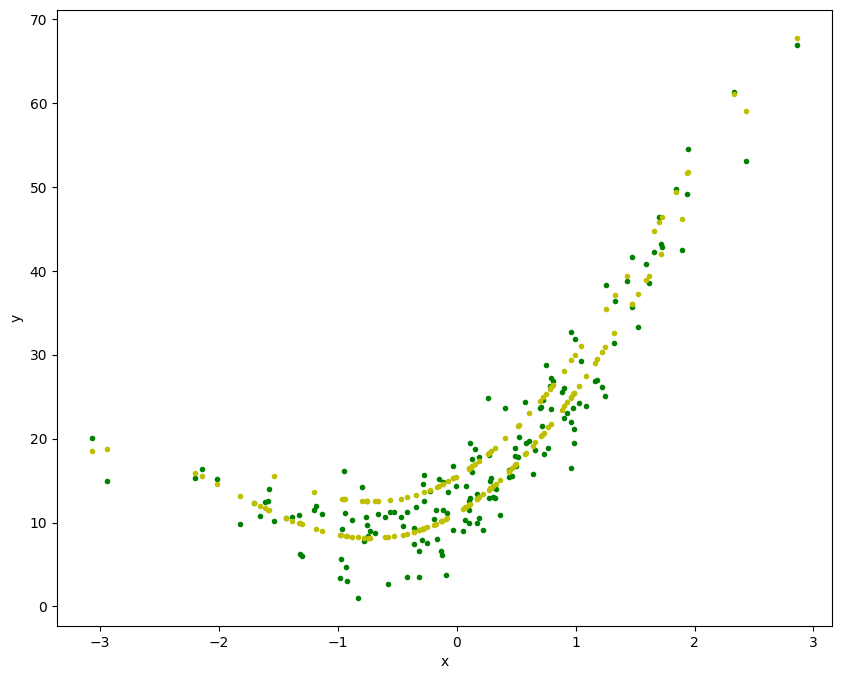

In [52]:
# assemble matrix A
df1=df.iloc[0:160,:]
X1=list(df1['x1'])
X2=list(df1['x2'])

X1_2=[]
X1_4=[]
for i in range(len(X1)):
    X1_2.append(pow(X1[i],2))
    X1_4.append(pow(X1[i],4))
X = np.vstack([X1,X1_2,X1_4,X2,np.ones(len(X2))]).T
# turn y into a column vector
y1=[]
y1=df1['y']
y1 = y1[:, np.newaxis]
# Direct least square regression
Theta = np.dot((np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)),y1)
print(Theta)
y_pred=[]
for i in range(len(X1)):

        y_pred.append(Theta[0]*X1[i] + Theta[1]*X1_2[i]+Theta[2]*X1_4[i] + Theta[3]*X2[i]+Theta[4]+1)
# plot the results
plt.figure(figsize = (10,8))
plt.plot(X1, y1, 'g.')
plt.plot(X1, y_pred, 'y.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



In [53]:
RSS_model = (np.sum(np.square(y1-y_pred)))
RSS_model

1488.3312379696272

C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\1686994237.py:3: RuntimeWarning: divide by zero encountered in log
  y2.append(np.log(scipy.stats.norm.pdf(y_pred,i,1)).sum())


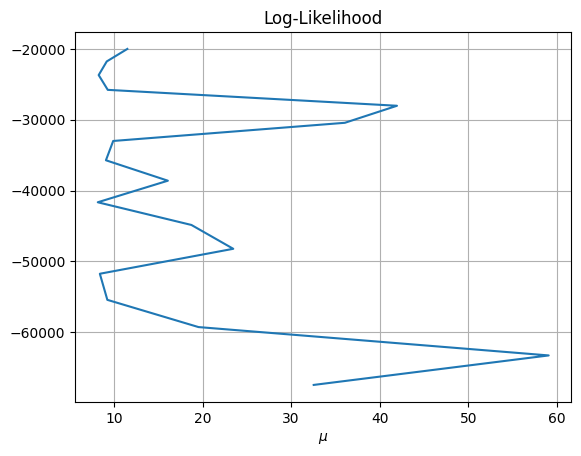

In [54]:
y2 = []
for i in range(len(y_pred)):
    y2.append(np.log(scipy.stats.norm.pdf(y_pred,i,1)).sum())
plt.plot(y_pred,y2)
plt.title(r'Log-Likelihood')
plt.xlabel(r'$\mu$')
plt.grid()
plt.savefig("likelihood_normal_distribution_02.png", bbox_inches='tight')
#plt.show()

In [55]:
X = sm.add_constant(X)
#fit regression model
model = sm.OLS(y1, X).fit()
#view AIC of model
print("AIC : ",model.aic)
#view BIC of model
print("BIC : ",model.bic)

AIC :  802.7011162067699
BIC :  818.0769852829391


C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\4116469019.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1 = y1[:, np.newaxis]


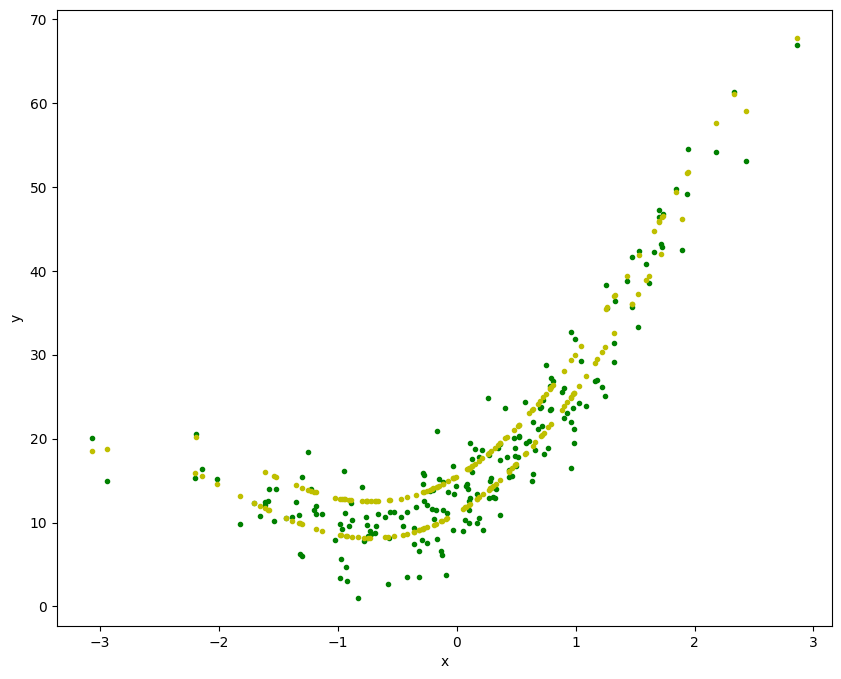

In [56]:
# assemble matrix A
df1=df.iloc[160:200,:]
X1=list(df['x1'])
X2=list(df['x2'])

X1_2=[]
X1_4=[]
for i in range(len(X1)):
    X1_2.append(pow(X1[i],2))
    X1_4.append(pow(X1[i],4))
X = np.vstack([X1,X1_2,X1_4,X2,np.ones(len(X2))]).T
# turn y into a column vector
y1=df['y']
y1 = y1[:, np.newaxis]
y_pred=[]
for i in range(len(X1)):
    y_pred.append(Theta[0]*X1[i] + Theta[1]*X1_2[i]+Theta[2]*X1_4[i] + Theta[3]*X2[i]+Theta[4]+1)
# plot the results
plt.figure(figsize = (10,8))
plt.plot(X1, y1, 'g.')
plt.plot(X1, y_pred, 'y.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Task 2.7

C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\1547716631.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1 = y1[:, np.newaxis]


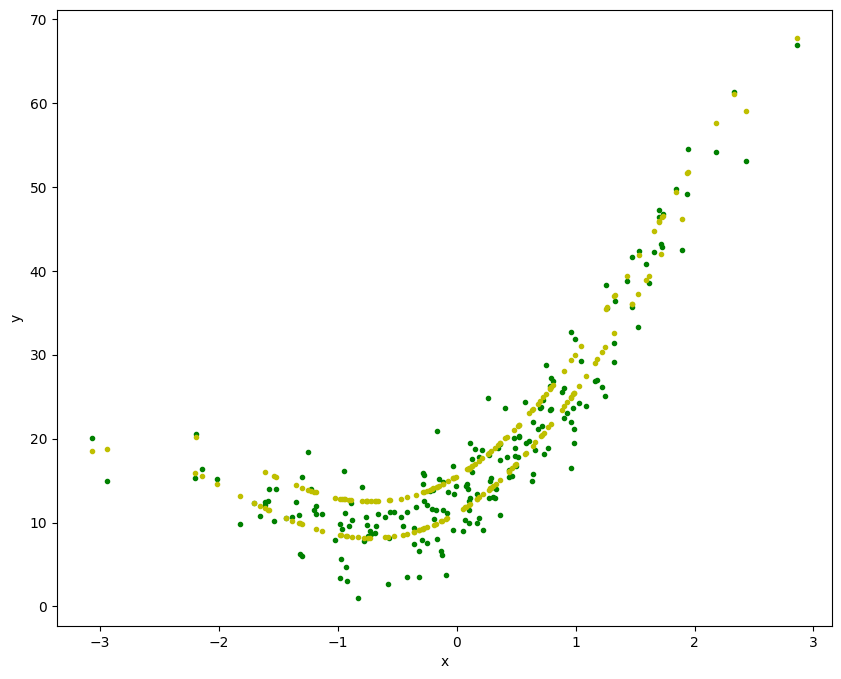

In [57]:
# Training
df1=df.iloc[0:140,:]
X1=list(df['x1'])
X2=list(df['x2'])
X1_2=[]
X1_4=[]
for i in range(len(X1)):
    X1_2.append(pow(X1[i],2))
    X1_4.append(pow(X1[i],4))
X = np.vstack([X1,X1_2,X1_4,X2,np.ones(len(X2))]).T
# turn y into a column vector
y1=df['y']
y1 = y1[:, np.newaxis]
# Theta = np.dot((np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)),y1)
# print(Theta)
y_pred=[]
for i in range(len(X1)):
    y_pred.append(Theta[0]*X1[i] + Theta[1]*X1_2[i]+Theta[2]*X1_4[i] + Theta[3]*X2[i]+Theta[4]+1)
# plot the results
plt.figure(figsize = (10,8))
plt.plot(X1, y1, 'g.')
plt.plot(X1, y_pred, 'y.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [58]:
#Testing

# assemble matrix A
df1=df.iloc[140:200,:]
X1=list(df['x1'])
X2=list(df['x2'])
X1_2=[]
X1_4=[]
for i in range(len(X1)):
    X1_2.append(pow(X1[i],2))
    X1_4.append(pow(X1[i],4))


X = np.vstack([X1,X1_2,X1_4,X2,np.ones(len(X2))]).T
# turn y into a column vector
y1=df['y']
y1 = y1[:, np.newaxis]

C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\855924183.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1 = y1[:, np.newaxis]


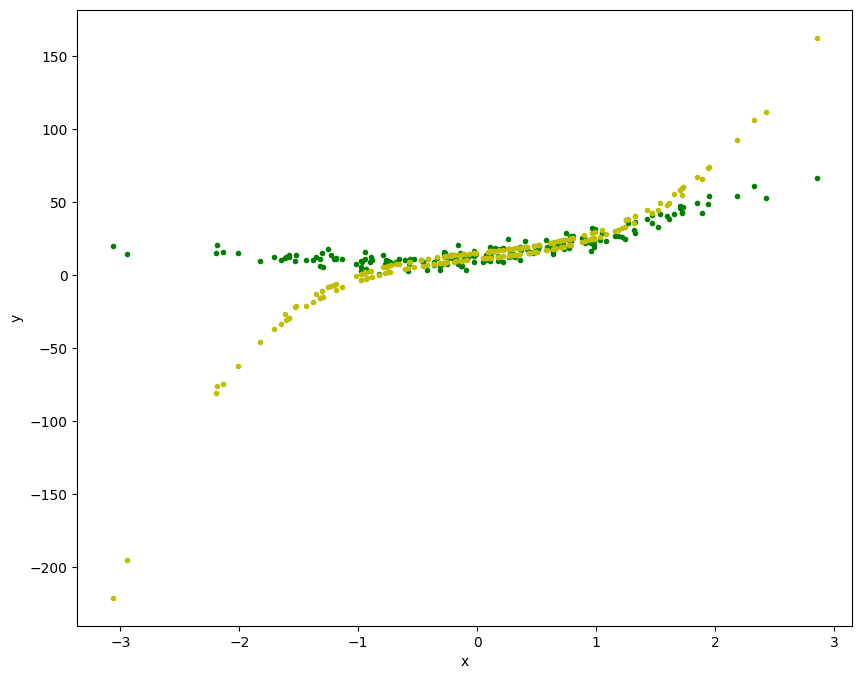

In [59]:
y_pred=[]
for i in range(len(X1)):
    y_pred.append(Theta[0]*X1[i] + Theta[1]*X1_3[i]+Theta[2]*X1_4[i] + Theta[3]*X2[i]+Theta[4]+1)
    # plot the results
plt.figure(figsize = (10,8))
plt.plot(X1, y1, 'g.')
plt.plot(X1, y_pred, 'y.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

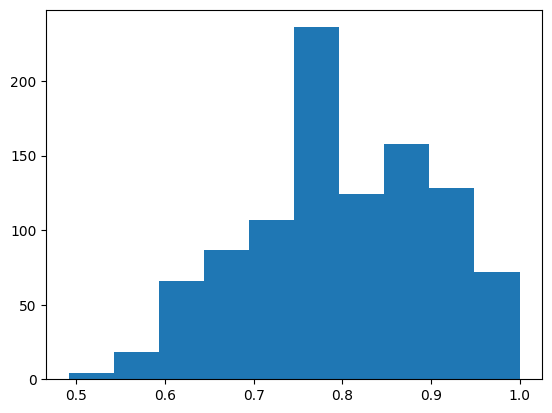


95.0 confidence interval 0.6068777100036211 and 0.9705080530235108


In [60]:

x =X
# configure bootstrap
n_iterations = 1000 # here k=no. of bootstrapped samples
n_size = int(len(x))
# run bootstrap
medians = list()
for i in range(n_iterations):
   s = resample(x, n_samples=n_size);
   m = np.median(s);
   medians.append(m)
# plot scores
plt.hist(medians)
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(medians, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(medians, p)
print(f"\n{alpha*100} confidence interval {lower} and {upper}")


# Task 3

In [61]:
# assemble matrix A
df1=df.iloc[0:160,:]
X1=list(df['x1'])
X2=list(df['x2'])
X1_2=[]
X1_4=[]
for i in range(len(X1)):
    X1_2.append(pow(X1[i],2))
    X1_4.append(pow(X1[i],4))
X = np.vstack([X1,np.ones(len(X2))]).T
# turn y into a column vector
y1=df['y']
y1 = y1[:, np.newaxis]


C:\Users\guddu\AppData\Local\Temp\ipykernel_13992\3341915169.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1 = y1[:, np.newaxis]


In [62]:
# Direct least square regression
Theta = np.dot((np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)),y1)
print(Theta)

[[ 8.72150983]
 [18.03657153]]


In [63]:
y_pred=[]
for i in range(len(X1)):
    y_pred.append(Theta[0]*X1[i] + 6.2*X1_2[i]+(-0.285)*X1_4[i] + 4.34*X2[i]+Theta[1]+1)

In [64]:
plt.rcParams.update({'lines.linewidth': 2})
colors=[plt.cm.Set2(i) for i in np.linspace(0, 1, 8)]
plt.rcParams.update({'axes.prop_cycle': cycler('color', colors)})

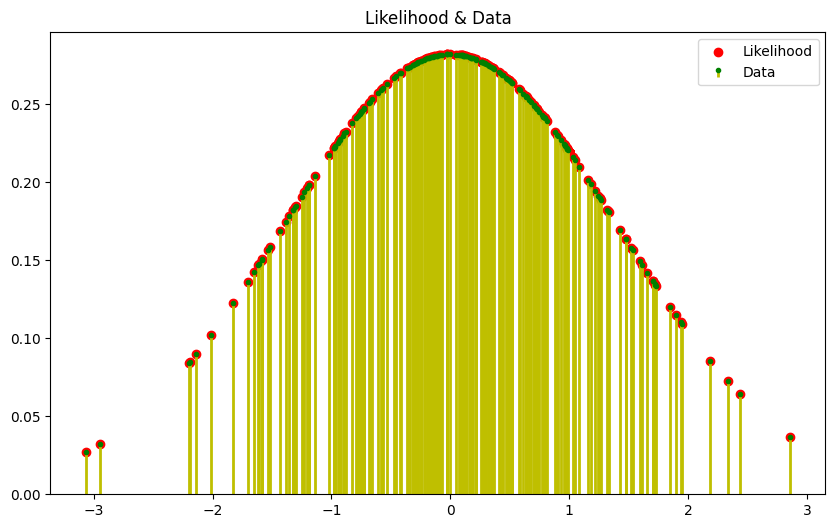

In [65]:
Nsamp = 200
groundtruth=2.
likelihood=norm(loc=0.,scale=np.sqrt(groundtruth))
(dmin,dmax)=(-5,5)
data=X1
lh_data=likelihood.pdf(data)
x_arr=X
f_arr=likelihood.pdf(x_arr)
plt.figure(figsize=(10,6))
plt.scatter(x_arr,f_arr,color='r',label="Likelihood")
markerline, stemlines, baseline = plt.stem(data,lh_data,linefmt='-y',markerfmt='g.',label="Data")
baseline.set_visible(False)
plt.title("Likelihood & Data")
plt.legend()
plt.ylim(bottom=0.)
plt.show()

In [66]:
alpha=60
beta=130
prior=invgamma(alpha,loc=0,scale=beta)
alphaprime=alpha+Nsamp/2
data2=[]
for i in range(len(data)):
    data2.append(pow(data[i],2))
betaprime=beta+1/2.*np.sum(data2)
posterior=invgamma(alphaprime,loc=0,scale=betaprime)

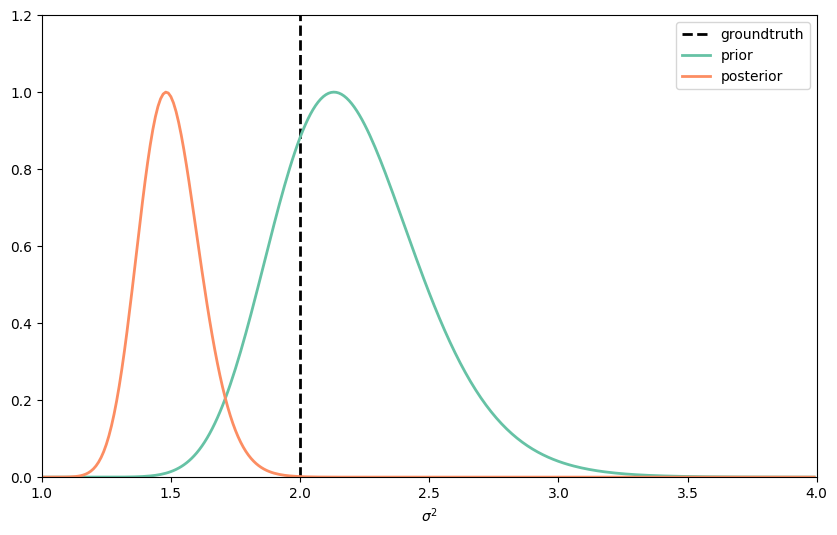

In [67]:
a=1
b=4
x=np.arange(a,b,0.01)
plt.figure(figsize=(10,6))
plt.xlim([a,b])
plt.xlabel("$\sigma^2$")
plt.ylim([0,1.2])
plt.plot([groundtruth,groundtruth],[0,1.2],linestyle='--',color='black',label="groundtruth")
plt.plot(x,prior.pdf(x)/prior.pdf(x).max(),label="prior")
plt.plot(x,posterior.pdf(x)/posterior.pdf(x).max(),label="posterior")
plt.legend()
plt.show()


# Likelihood-free rejection sampling

In [68]:

def simulator(var):
    return norm(loc=0.,scale=np.sqrt(var)).rvs(size=Nsamp)
def distance(sim_ss,data_ss):
    return np.sqrt(np.sum((sim_ss-data_ss)**2))

In [69]:
#Likelihood-free rejection sampling
def simulator(var):
    return norm(loc=0.,scale=np.sqrt(var)).rvs(size=Nsamp)
def distance(sim_ss,data_ss):
    return np.sqrt(np.sum((sim_ss-data_ss)**2))
Ntries=10000


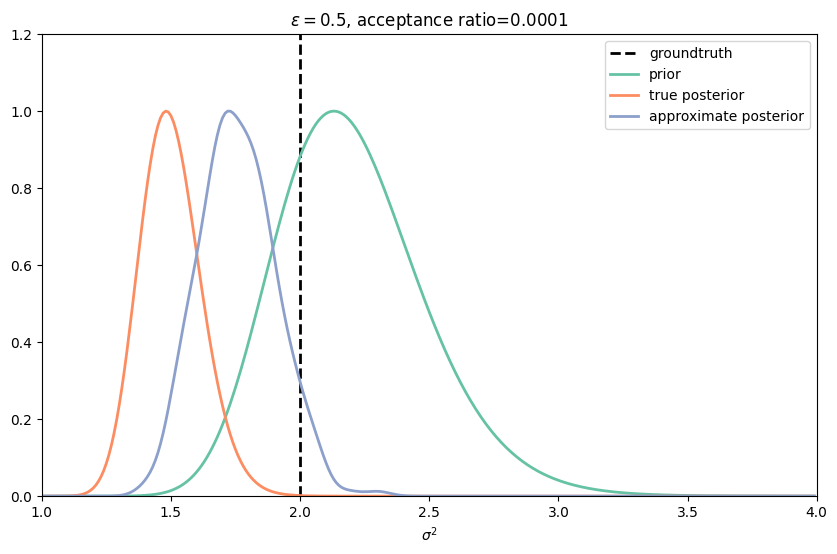

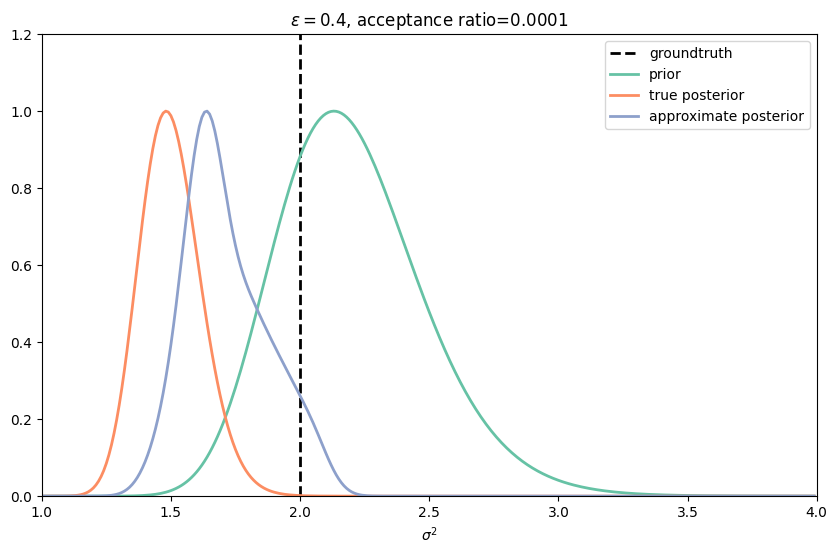

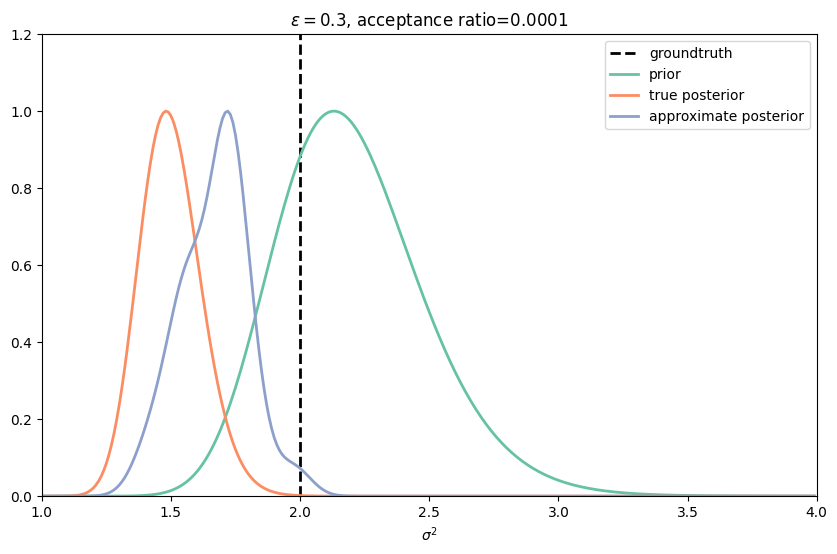

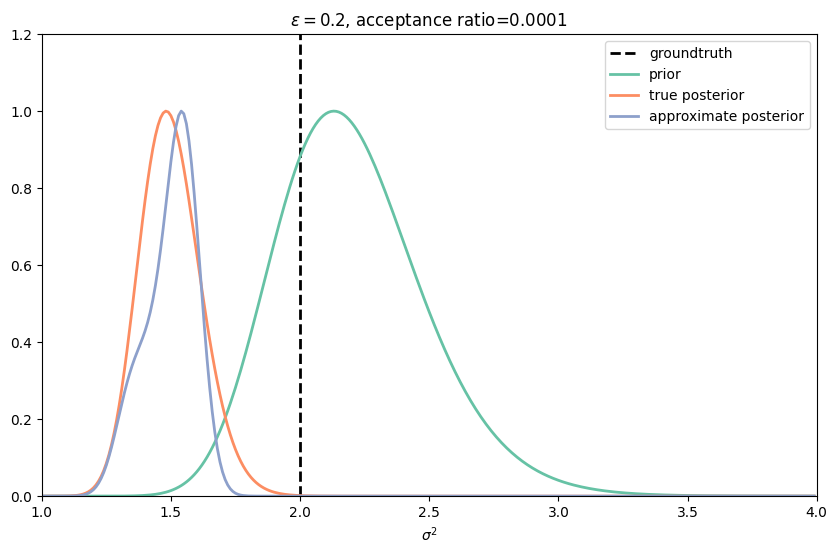

In [70]:
# sufficient summary statistics
def sufficient_summary_stat(data):
    return np.var(data)
data_ss=sufficient_summary_stat(data)
for epsilon in [0.5,0.4,0.3,0.2]:
    # likelihood-free rejection sampler
    # note that we never call the likelihood function!
    samples=[]
    for this_try in range(Ntries):
        this_var = prior.rvs(size=1)
        this_sim = simulator(this_var)
        this_ss = sufficient_summary_stat(this_sim)
        if(distance(this_ss,data_ss)<epsilon):
            samples.append(this_var)
    samples=np.array(samples).T
    fraction_accepted=float(len(samples))/Ntries
    # kernel density estimation of the approximate posterior
    kernel=gaussian_kde(samples)
    # produce a plot
    plt.figure(figsize=(10,6))
    plt.xlim([a,b])
    plt.xlabel("$\sigma^2$")
    plt.ylim([0,1.2])
    plt.plot([groundtruth,groundtruth],[0,1.2],linestyle='--',color='black',label="groundtruth")
    plt.plot(x,prior.pdf(x)/prior.pdf(x).max(),label="prior")
    plt.plot(x,posterior.pdf(x)/posterior.pdf(x).max(),label="true posterior")
    plt.plot(x,kernel.evaluate(x)/kernel.evaluate(x).max(),label="approximate posterior")
    plt.title("$\\varepsilon="+str(epsilon)+"$, acceptance ratio="+str(fraction_accepted))
    plt.legend()
    plt.show()


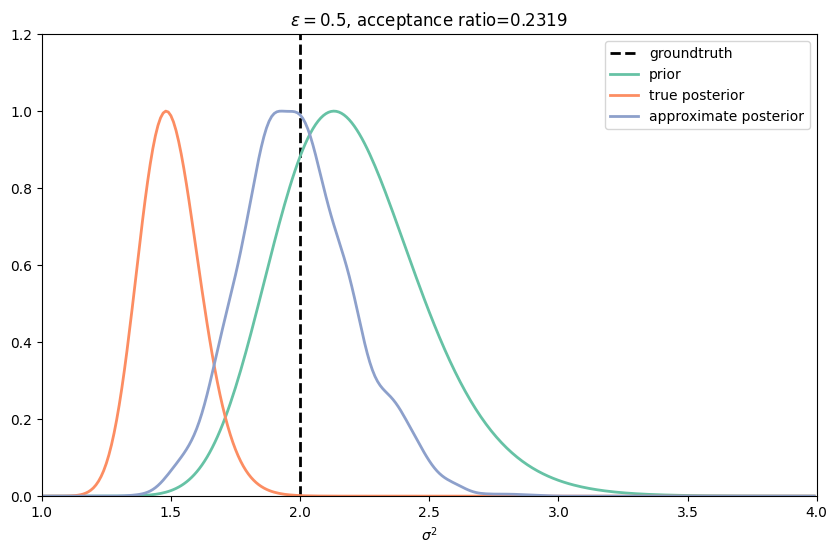

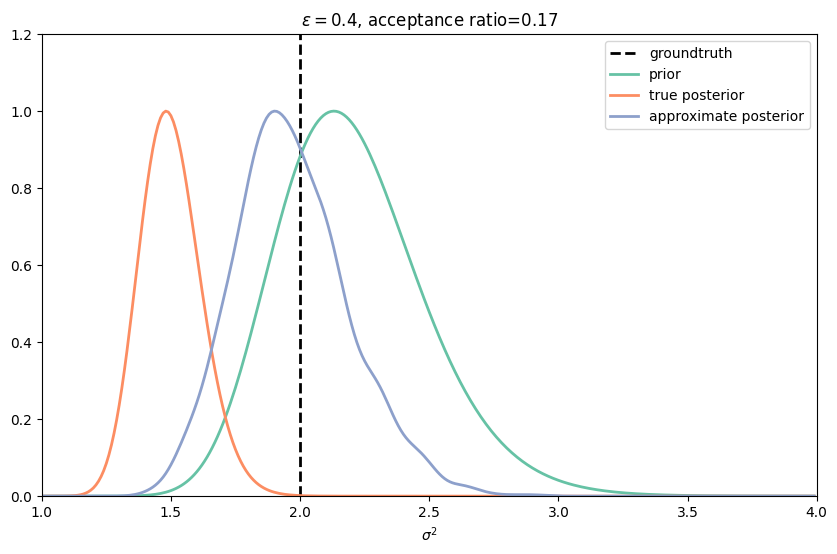

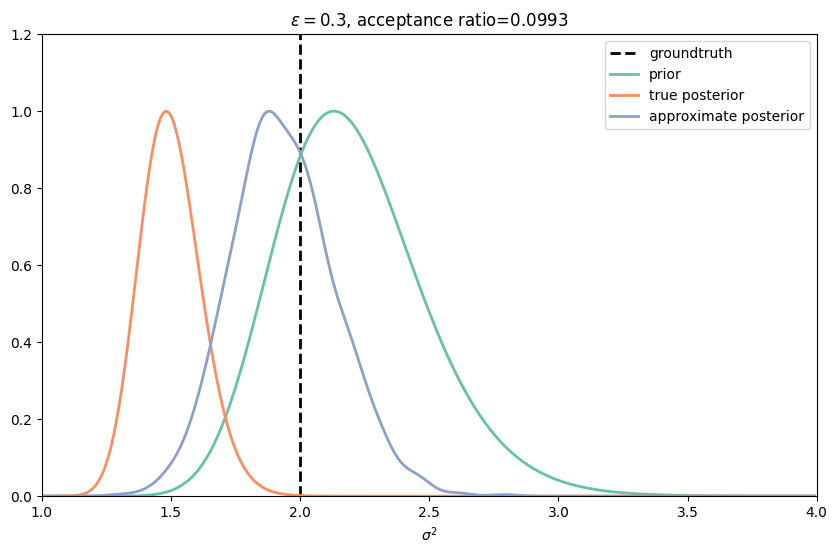

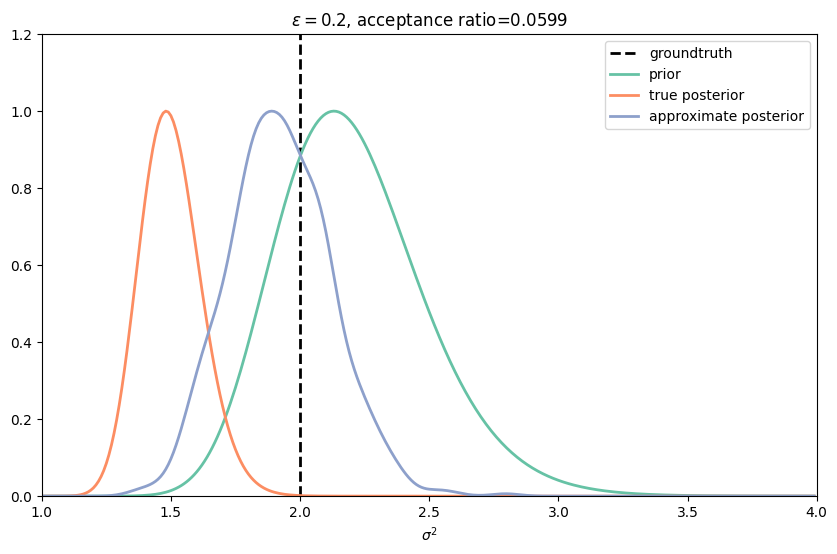

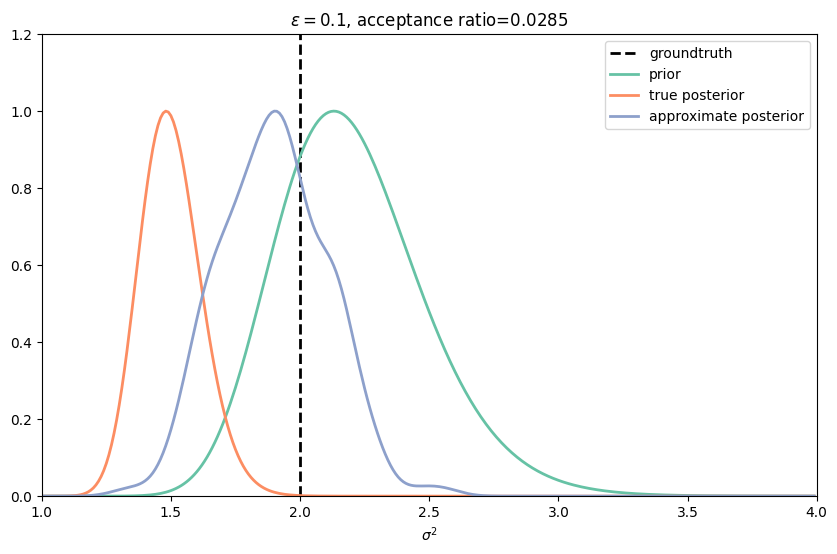

In [71]:
# insufficient summary statistics: throw away most of the information
def insufficient_summary_stat(data):
    return np.var(data[0:int(Nsamp/3.)])
data_ss=insufficient_summary_stat(data)
for epsilon in [0.5,0.4,0.3,0.2,0.1]:
    # likelihood-free rejection sampler
    # note that we never call the likelihood function!
    samples=[]
    for this_try in range(Ntries):
        this_var = prior.rvs(size=1)
        this_sim = simulator(this_var)
        this_ss = insufficient_summary_stat(this_sim)
        if(distance(this_ss,data_ss)<epsilon):
            samples.append(this_var)
    samples=np.array(samples).T[0]
    fraction_accepted=float(len(samples))/Ntries
    # kernel density estimation of the approximate posterior
    kernel=gaussian_kde(samples)
    # produce a plot
    plt.figure(figsize=(10,6))
    plt.xlim([a,b])
    plt.xlabel("$\sigma^2$")
    plt.ylim([0,1.2])
    plt.plot([groundtruth,groundtruth],[0,1.2],linestyle='--',color='black',label="groundtruth")
    plt.plot(x,prior.pdf(x)/prior.pdf(x).max(),label="prior")
    plt.plot(x,posterior.pdf(x)/posterior.pdf(x).max(),label="true posterior")
    plt.plot(x,kernel.evaluate(x)/kernel.evaluate(x).max(),label="approximate posterior")
    plt.title("$\\varepsilon="+str(epsilon)+"$, acceptance ratio="+str(fraction_accepted))
    plt.legend()
    plt.show()
